# 0619 수업 정리
- 문제 사황
- 데이터 전처리

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("Hello World")

Hello World


In [3]:
wine = pd.read_csv("Wine.csv")
wine

,alcohol,sugar,pH,type
0,9.4,1.9,3.51,Red
1,9.8,2.6,3.20,Red
2,9.8,2.3,3.26,Red
3,9.8,1.9,3.16,Red
4,9.4,1.9,3.51,Red
...,...,...,...,...
6492,11.2,1.6,3.27,White
6493,9.6,8.0,3.15,White
6494,9.4,1.2,2.99,White
6495,12.8,1.1,3.34,White


In [6]:
wine.info()
# 기본적인 정보 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   type     6497 non-null   object 
dtypes: float64(3), object(1)
memory usage: 203.2+ KB


In [7]:
wine.describe()
# 특성별로 통계치 확인 하기

,alcohol,sugar,pH
count,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501
std,1.192712,4.757804,0.160787
min,8.000000,0.600000,2.720000
25%,9.500000,1.800000,3.110000
50%,10.300000,3.000000,3.210000
75%,11.300000,8.100000,3.320000
max,14.900000,65.800000,4.010000


In [11]:
data_input = wine.drop(["type"], axis=1)
data_input = data_input.to_numpy()

data_input[:5]

array([[9.4 , 1.9 , 3.51],
       [9.8 , 2.6 , 3.2 ],
       [9.8 , 2.3 , 3.26],
       [9.8 , 1.9 , 3.16],
       [9.4 , 1.9 , 3.51]])

In [14]:
data_target = wine["type"]
data_target = data_target.to_numpy()

data_target[:5]

array(['Red', 'Red', 'Red', 'Red', 'Red'], dtype=object)

In [22]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(data_input, data_target,
                                                                       test_size= 0.2,
                                                                       stratify=data_target,
                                                                       random_state=42)

print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(5197, 3) (5197,)
(1300, 3) (1300,)


In [24]:
from sklearn.preprocessing import StandardScaler

scaler_std = StandardScaler()
scaler_std.fit(train_input)

train_scaled = scaler_std.transform(train_input)
test_scaled = scaler_std.transform(test_input)

print(train_scaled[:5])
print(test_scaled[:5])

[[-0.91211058  1.22911099 -0.17470179]
 [ 0.42727963 -0.88716382 -0.98652017]
 [ 0.59470341 -0.12530489 -0.61183476]
 [ 0.51099152 -0.61204809  0.63711659]
 [ 0.42727963 -0.65437359  1.13669714]]
[[-0.24241547 -0.67553634  0.51222146]
 [ 0.09243208 -0.0406539  -0.23714936]
 [-0.24241547  1.58887771  0.13753605]
 [ 0.59470341 -0.90832657  1.82362038]
 [ 1.68295795 -0.63321084  0.13753605]]


In [25]:
from sklearn.tree import DecisionTreeClassifier

model_dtc = DecisionTreeClassifier(random_state=42)
model_dtc.fit(train_scaled, train_target)

DecisionTreeClassifier(random_state=42)

KeyboardInterrupt: 

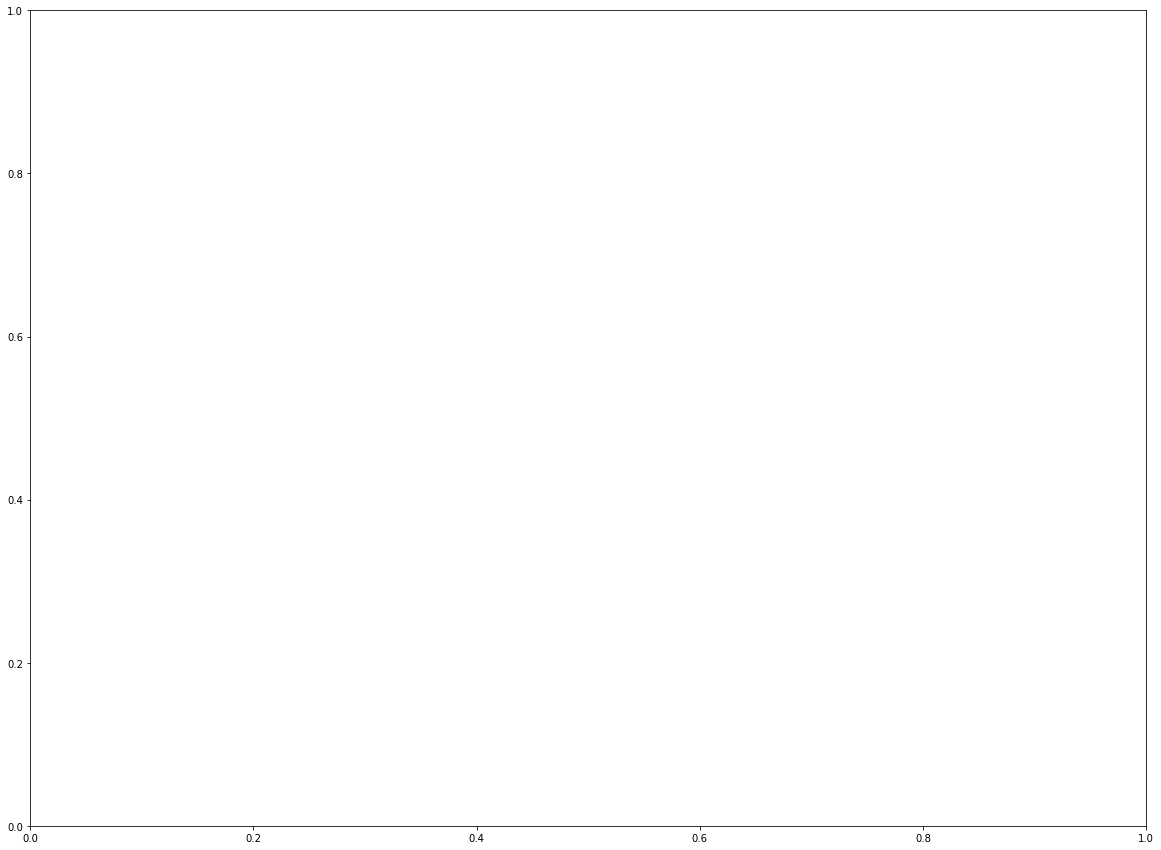

In [28]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 15))

plot_tree(model_dtc)

plt.show()

In [33]:
print(f"훈련 세트로 퍙가한 정확도 : {model_dtc.score(train_scaled, train_target)}")
print(f"테스트 세트로 퍙가한 정확도 : {model_dtc.score(test_scaled, test_target)}")

# 훈련 세트 점수가 테스트 세트 전부보다 더 높다 => 과대적합
# 이 경우 트리의 최대 깊이를 설정해준다 => 가지치기 하다.

훈련 세트로 퍙가한 정확도 : 0.6613430825476236
테스트 세트로 퍙가한 정확도 : 0.6492307692307693


In [44]:
model_dtc = DecisionTreeClassifier(max_depth=3, random_state=42) # max_depth를 지정해서 결정트리의 깊이를 지정
model_dtc.fit(train_scaled, train_target)

DecisionTreeClassifier(max_depth=3, random_state=42)

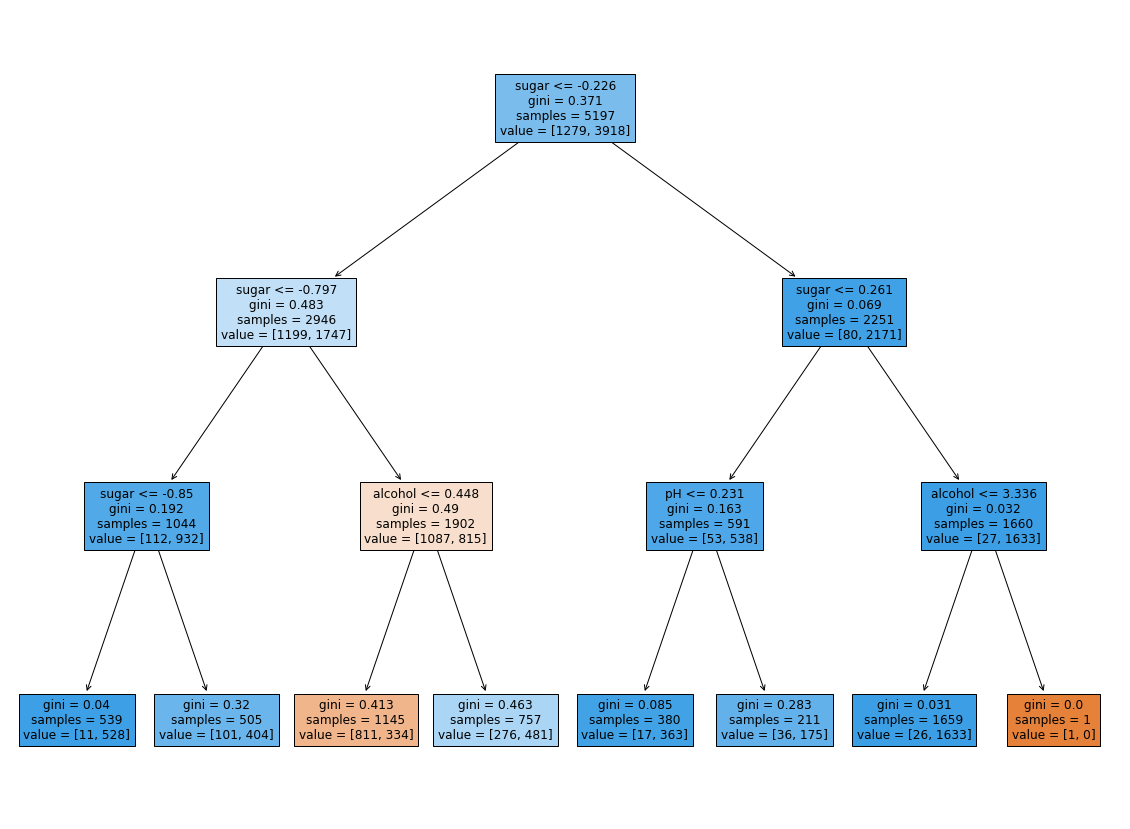

In [45]:
plt.figure(figsize=(20, 15))

plot_tree(model_dtc, filled=True, feature_names=["alcohol", "sugar", "pH"])

plt.show()

In [46]:
print(f"훈련 세트로 퍙가한 정확도 : {model_dtc.score(train_scaled, train_target)}")
print(f"테스트 세트로 퍙가한 정확도 : {model_dtc.score(test_scaled, test_target)}")

훈련 세트로 퍙가한 정확도 : 0.8458726188185491
테스트 세트로 퍙가한 정확도 : 0.8407692307692308


In [47]:
print(model_dtc.feature_importances_)

# 각 특성별로 미치는 영향력을 가져온다.
# 의미가 없는 특성의 차원을 줄일 수 있다.

[0.14086835 0.85360568 0.00552597]


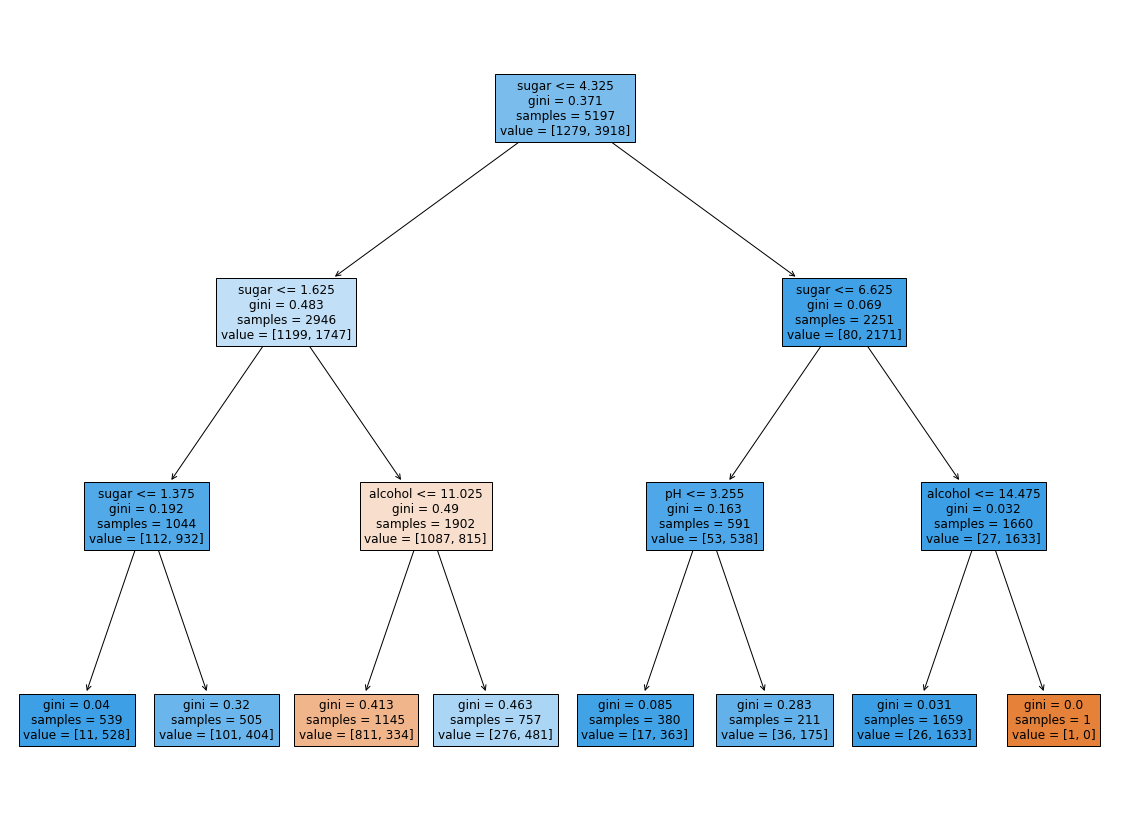

훈련 세트로 퍙가한 정확도 : 0.6613430825476236
테스트 세트로 퍙가한 정확도 : 0.6492307692307693


In [50]:
# 스케일 한 값은 알아보기 어려우니 스케일 전 값으로 모델을 생성
model_dtc = DecisionTreeClassifier(max_depth=3, random_state=42) # max_depth를 지정해서 결정트리의 깊이를 지정
model_dtc.fit(train_input, train_target)

plt.figure(figsize=(20, 15))

plot_tree(model_dtc, filled=True, feature_names=["alcohol", "sugar", "pH"])

plt.show()


print(f"훈련 세트로 퍙가한 정확도 : {model_dtc.score(train_scaled, train_target)}")
print(f"테스트 세트로 퍙가한 정확도 : {model_dtc.score(test_scaled, test_target)}")